In [1]:
# Data from Nathan
hw_shoulder = [93.58974358974359, 5.128205128205128, 1.282051282051282]
rr_shoulder = [33.33333333333333, 43.75, 22.916666666666664]

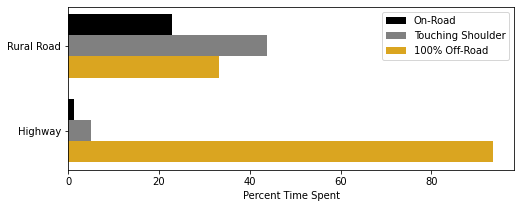

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Make bar numbers
bar_width = 0.25
x1 = np.arange(2)
x2 = [x + bar_width for x in x1]
x3 = [x + 2*bar_width for x in x1]

# Plot bars
ax.barh(x3, [hw_shoulder[2], rr_shoulder[2]], bar_width, label="On-Road", color="black")
ax.barh(x2, [hw_shoulder[1], rr_shoulder[1]], bar_width, label="Touching Shoulder", color="grey")
ax.barh(x1, [hw_shoulder[0], rr_shoulder[0]], bar_width, label="100% Off-Road", color="goldenrod")

# Labels
ax.legend()
ax.set_yticks(x2)
ax.set_yticklabels(["Highway", "Rural Road"])
ax.set_xlabel("Percent Time Spent")
fig.set_size_inches(8,3)

Text(0.5, 0, 'Percent Time Spent')

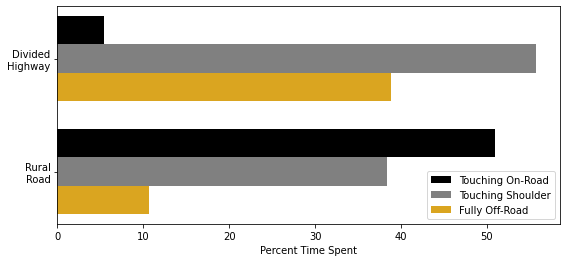

In [8]:
# Data from 2024-12-05 slides
data = {
    # Category: [rural, highway]
    "Touching On-Road": [50.9, 5.4],
    "Touching Shoulder": [38.4, 55.7],
    "Fully Off-Road": [100-(50.9+38.4), 100-(5.4+55.7)]
}
x = {
    "Touching On-Road":  x3,
    "Touching Shoulder": x2,
    "Fully Off-Road":    x1
}
color = {
    "Touching On-Road":  "black",
    "Touching Shoulder": "grey",
    "Fully Off-Road":    "goldenrod"
}

# Plot bars
plt.figure(figsize=(9,4))
for cat in data:
    plt.barh(x[cat], data[cat], bar_width, label=cat, color=color[cat])

# Labels
plt.legend()
plt.yticks(ticks=x2, labels=["Rural\nRoad", "Divided\nHighway"])
plt.xlabel("Percent Time Spent")

In [33]:
# More data from Nathan, reformatted more betterer
hw_obstacles = {
    'Sign': {"see": 142, "touch": 15, "break": 1},
    'Post': {"see": 425, "touch": 169, "break": 23},
    'Mailbox': {"see": 0, "touch": 0, "break": 0},
    'Telephone\nPole': {"see": 0, "touch": 0, "break": 0},
    'Cone': {"see": 24, "touch": 18, "break": 1},
    'Branches': {"see": 0, "touch": 0, "break": 0},
    'Drain': {"see": 4, "touch": 0, "break": 0},
    'Roadkill': {"see": 4, "touch": 0, "break": 0},
    'Guardrail': {"see": 2, "touch": 0, "break": 0},
    'Trash': {"see": 1, "touch": 1, "break": 0},
}

rr_obstacles = {
    'Sign': {"see": 838, "touch": 133, "break": 10},
    'Post': {"see": 271, "touch": 66, "break": 8},
    'Mailbox': {"see": 213, "touch": 0, "break": 1},
    'Telephone\nPole': {"see": 47, "touch": 2, "break": 00},
    'Cone': {"see": 2, "touch": 0, "break": 0},
    'Branches': {"see": 29, "touch": 6, "break": 1},
    'Drain': {"see": 19, "touch": 0, "break": 0},
    'Roadkill': {"see": 6, "touch": 1, "break": 0},
    'Guardrail': {"see": 1, "touch": 0, "break": 0},
    'Trash': {"see": 1, "touch": 0, "break": 0},
}

In [34]:
ranklist = {}
for obs in hw_obstacles:
    ranklist[obs] = 0
    for t in hw_obstacles[obs]:
        ranklist[obs] += hw_obstacles[obs][t]
        ranklist[obs] += rr_obstacles[obs][t]

sorted(ranklist, key=lambda x: ranklist[x], reverse=True)

['Sign',
 'Post',
 'Mailbox',
 'Telephone\nPole',
 'Cone',
 'Branches',
 'Drain',
 'Roadkill',
 'Guardrail',
 'Trash']

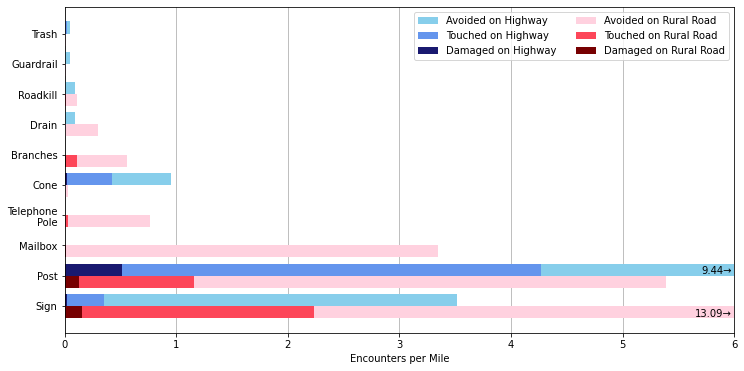

In [35]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
xx = np.arange(len(hw_obstacles))

bar_width = 0.4

# Bar heights
## Highway heights, per 45mi of HW data (see 2023-12-20 slides)
hw_see = [hw_obstacles[x]["see"]/45 for x in hw_obstacles]
hw_touch = [hw_obstacles[x]["touch"]/45 for x in hw_obstacles]
hw_break = [hw_obstacles[x]["break"]/45 for x in hw_obstacles]

## Rural heights, per 64 mi of RR data (see 2023-12-20 slides)
rr_see = [rr_obstacles[x]["see"]/64 for x in rr_obstacles]
rr_touch = [rr_obstacles[x]["touch"]/64 for x in rr_obstacles]
rr_break = [rr_obstacles[x]["break"]/64 for x in rr_obstacles]

# Highway bars
ax.barh(xx+bar_width, hw_see, bar_width, left=[a+b for a,b in zip(hw_break, hw_touch)], label="Avoided on Highway", color="skyblue")
ax.barh(xx+bar_width, hw_touch, bar_width, left=hw_break, label="Touched on Highway", color="cornflowerblue")
ax.barh(xx+bar_width, hw_break, bar_width, label="Damaged on Highway", color="midnightblue")

# Rural bars
ax.barh(xx, rr_see, bar_width, left=[a+b for a,b in zip(rr_break, rr_touch)], label="Avoided on Rural Road", color="xkcd:light pink")
ax.barh(xx, rr_touch, bar_width, left=rr_break, label="Touched on Rural Road", color="xkcd:watermelon")
ax.barh(xx, rr_break, bar_width, label="Damaged on Rural Road", color="xkcd:blood")

# Labels
ax.set_yticks(xx+(bar_width/2))
ax.set_yticklabels(hw_obstacles.keys())
ax.legend(ncol=2)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.grid(visible=True, which="major", axis="x")
ax.set_axisbelow(True)
ax.set_xlabel("Encounters per Mile")
ax.set_xlim(right=6)

# Annotations
ax.annotate(f"{round(rr_see[0], 2)}→", (5.98, xx[0]-0.7*bar_width/2), ha="right")
ax.annotate(f"{round(hw_see[1], 2)}→", (5.98, xx[1]+1.3*bar_width/2), ha="right")

fig.set_size_inches(12,6)

In [36]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.25
HW_DIST = 45
RR_DIST = 64

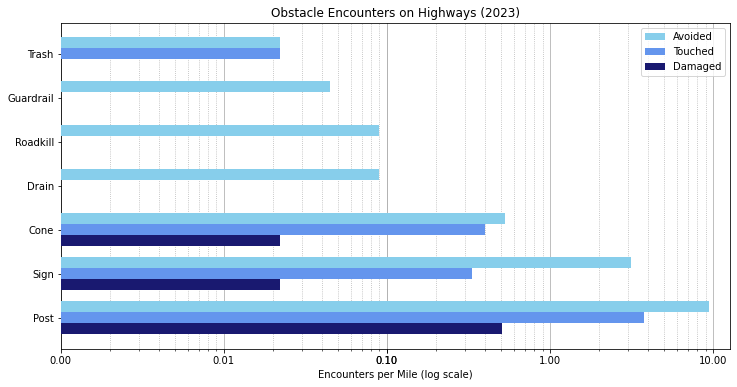

In [39]:
plt.figure(figsize=(12,6))

# Get list of obstacles for dataset
smbars = []
for obs in hw_obstacles:
    if sum(hw_obstacles[obs].values()) != 0:
        smbars.append(obs)
smbars = sorted(smbars, key=lambda x: hw_obstacles[x]["see"], reverse=True)

# Plot bars
xx = np.arange(len(smbars))
plt.barh(xx+bar_width, [hw_obstacles[i]["see"]/HW_DIST for i in smbars], height=bar_width, label="Avoided", color="skyblue", zorder=10)
plt.barh(xx, [hw_obstacles[i]["touch"]/HW_DIST for i in smbars], height=bar_width, label="Touched", color="cornflowerblue", zorder=10)
plt.barh(xx-bar_width, [hw_obstacles[i]["break"]/HW_DIST for i in smbars], height=bar_width, label="Damaged", color="midnightblue", zorder=10)

# Adjust axes and gridlines
plt.xscale("log")
plt.grid(True, "major", "x", zorder=1)
plt.grid(True, "minor", "x", linestyle=":", zorder=1)

# Format tick labels
plt.yticks(ticks=xx, labels=smbars)
xt = [0.1] # for the "0" position
b0 = max([hw_obstacles[i]["see"]/HW_DIST for i in smbars])
for x in [float(x) for x in plt.xticks()[0]]:
    xt.append(x)
    if x > b0: break  
plt.xticks(ticks=xt, labels=[f"{x:.2f}" for x in xt])

plt.legend()
plt.title("Obstacle Encounters on Highways (2023)")
plt.xlabel("Encounters per Mile (log scale)")
plt.show()

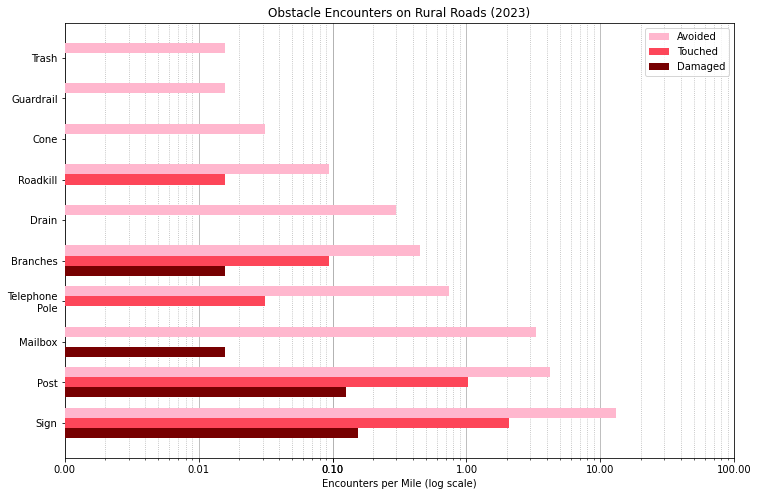

In [38]:
plt.figure(figsize=(12,8))

# Get list of obstacles for dataset
smbars = []
for obs in rr_obstacles:
    if sum(rr_obstacles[obs].values()) != 0:
        smbars.append(obs)
smbars = sorted(smbars, key=lambda x: rr_obstacles[x]["see"], reverse=True)

# Plot bars
xx = np.arange(len(smbars))
plt.barh(xx+bar_width, [rr_obstacles[i]["see"]/RR_DIST for i in smbars], height=bar_width, label="Avoided", color="xkcd:baby pink", zorder=10)
plt.barh(xx, [rr_obstacles[i]["touch"]/RR_DIST for i in smbars], height=bar_width, label="Touched", color="xkcd:watermelon", zorder=10)
plt.barh(xx-bar_width, [rr_obstacles[i]["break"]/RR_DIST for i in smbars], height=bar_width, label="Damaged", color="xkcd:blood", zorder=10)

# Adjust axes and gridlines
plt.xscale("log")
plt.grid(True, "major", "x", zorder=1)
plt.grid(True, "minor", "x", linestyle=":", zorder=1)

# Format tick labels
plt.yticks(ticks=xx, labels=smbars)
xt = [0.1] # for the "0" position
b0 = max([rr_obstacles[i]["see"]/RR_DIST for i in smbars])
for x in [float(x) for x in plt.xticks()[0]]:
    xt.append(x)
    if x > b0: break  
plt.xticks(ticks=xt, labels=[f"{x:.2f}" for x in xt])

plt.legend()
plt.title("Obstacle Encounters on Rural Roads (2023)")
plt.xlabel("Encounters per Mile (log scale)")
plt.show()